<a href="https://colab.research.google.com/github/dhermawan215/mit-pyhton/blob/main/bei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix
import seaborn as sns
import sklearn
from scipy import stats

from sklearn.model_selection import train_test_split


In [18]:
from sklearn import datasets
iris = datasets.load_iris()

irisTarget = iris.target
irisData = iris.data
irisTargetName = iris.target_names

irisDataShape = irisData.shape
irisTargetShape = irisTarget.shape

(150,)

In [24]:
from tensorflow import keras

yKeras = keras.utils.to_categorical(irisTarget)#convert label to ohe, source from iris target



In [5]:
#feature/data/column/field
x=np.array([[4899.64, 4969.25, 4947.04, 5004.40], #based on 4 previous days data we could
         [4969.25, 4947.04, 5004.40, 4976.57],  #successfully predict next day opening price
         [4947.04, 5004.40, 4976.57, 5018.74],  #raw data (low computation devices)
         [5004.40, 4976.57, 5018.74, 5036.48],  #feature importance (EDA) - last 2
         [4976.57, 5018.74, 5036.48, 5078.13],  #add/remove 1 or more features - last 1
         [5018.74, 5036.48, 5078.13, 5093.42],  #or else - last 0
         [5036.48, 5078.13, 5093.42, 5134.66], #naik
         [5078.13, 5093.42, 5134.66, 5172.59],
         [5093.42, 5134.66, 5172.59, 5111.43],
         [5134.66, 5172.59, 5111.43, 5116.76],
         [5172.59, 5111.43, 5116.76, 5120.91],
         [5111.43, 5116.76, 5120.91, 5116.79],
         [5116.76, 5120.91, 5116.79, 5084.79],
         [5120.91, 5116.79, 5084.79, 5112.79],
         [5116.79, 5084.79, 5112.79, 5113.15],
         [5084.79, 5112.79, 5113.15, 5133.54],
         [5112.79, 5113.15, 5133.54, 5108.03],
         [5113.15, 5133.54, 5108.03, 5133.98]])

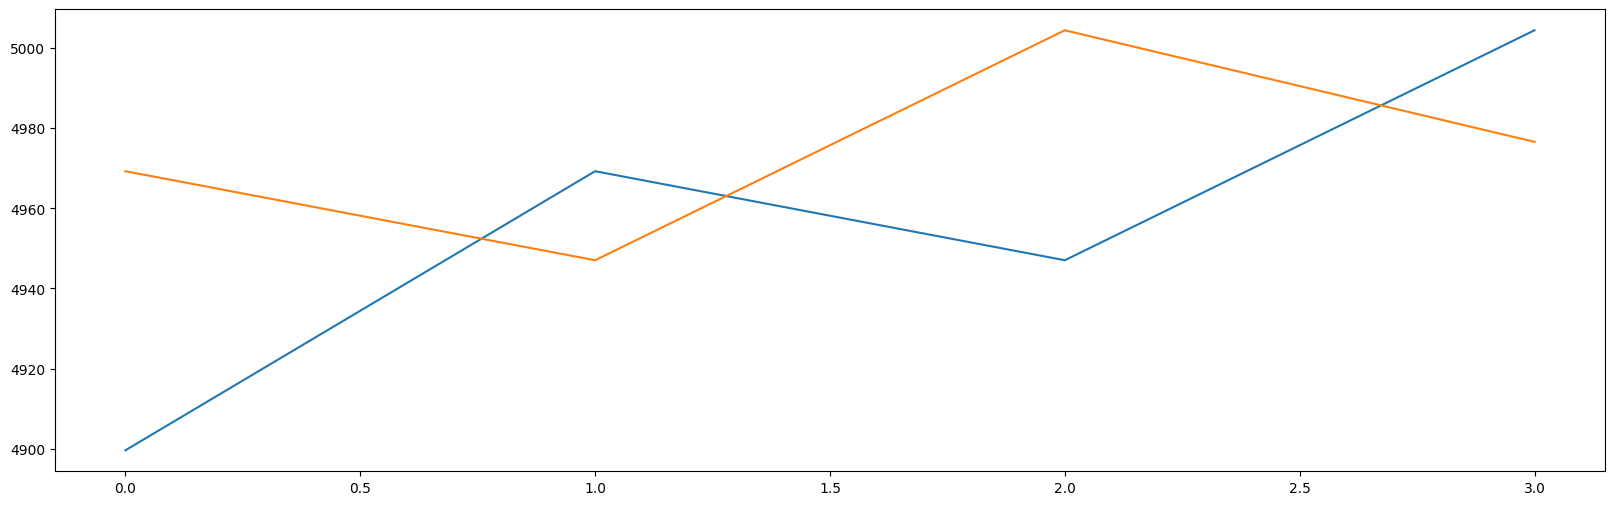

In [6]:
plt.figure(figsize=[20,6])
plt.plot(x[0])
plt.plot(x[1])

In [ ]:
print(x[:,0])

[4899.64 4969.25 4947.04 5004.4  4976.57 5018.74 5036.48 5078.13 5093.42
 5134.66 5172.59 5111.43 5116.76 5120.91 5116.79 5084.79 5112.79 5113.15]


In [ ]:
x.shape

(18, 4)

In [ ]:
x1=np.zeros((18,3), dtype=int)

In [ ]:
x2=np.zeros((18,4), dtype=int)

In [ ]:
(np.max(x[:,3])-np.min(x[:,3]))/3

65.34000000000015

In [ ]:
for i in range (18):
  if np.min(x[:,3]) <= x[i,3] < np.min(x[:,3]) + 65.34:
    x2[i,3] = 1
  if np.min(x[:,3]) + 65.34 <= x[i,3] < np.min(x[:,3]) + 130.68:
    x2[i,3] = 2
  if np.min(x[:,3]) + 130.68 <= x[i,3] < np.min(x[:,3]) + 196.99:
    x2[i,3] = 3

In [ ]:
x1[:,2]=x[:,3]-x[:,2]

In [ ]:
print(x1)

[[ 69 -22  57]
 [-22  57 -27]
 [ 57 -27  42]
 [-27  42  17]
 [ 42  17  41]
 [ 17  41  15]
 [ 41  15  41]
 [ 15  41  37]
 [ 41  37 -61]
 [ 37 -61   5]
 [-61   5   4]
 [  5   4  -4]
 [  4  -4 -32]
 [ -4 -32  28]
 [-32  28   0]
 [ 28   0  20]
 [  0  20 -25]
 [ 20 -25  25]]


In [ ]:
print(x2)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [2 1 1 1]
 [1 1 2 2]
 [2 2 2 2]
 [2 2 2 3]
 [2 2 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 2]
 [3 3 2 3]
 [3 2 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]


In [ ]:
print(x/np.max(x)) #normalize 0.8 x 0.8 = 0.64  4000 x 4000 = 16000000

[[0.94723146 0.96068894 0.95639515 0.96748437]
 [0.96068894 0.95639515 0.96748437 0.96210409]
 [0.95639515 0.96748437 0.96210409 0.97025668]
 [0.96748437 0.96210409 0.97025668 0.9736863 ]
 [0.96210409 0.97025668 0.9736863  0.98173836]
 [0.97025668 0.9736863  0.98173836 0.98469432]
 [0.9736863  0.98173836 0.98469432 0.99266712]
 [0.98173836 0.98469432 0.99266712 1.        ]
 [0.98469432 0.99266712 1.         0.98817614]
 [0.99266712 1.         0.98817614 0.98920657]
 [1.         0.98817614 0.98920657 0.99000887]
 [0.98817614 0.98920657 0.99000887 0.98921237]
 [0.98920657 0.99000887 0.98921237 0.98302591]
 [0.99000887 0.98921237 0.98302591 0.98843906]
 [0.98921237 0.98302591 0.98843906 0.98850866]
 [0.98302591 0.98843906 0.98850866 0.99245059]
 [0.98843906 0.98850866 0.99245059 0.98751883]
 [0.98850866 0.99245059 0.98751883 0.99253565]]


In [ ]:
x=x/np.max(x)

In [ ]:
#label (prediction label)
y=np.array([[1,0], #lower, one hot encoding [1,0,0] [0,0,1]
            [0,1], #higher, [0,1,0]
            [0,1], #higher, [0,1,0]
            [0,1],
        [0,1],
        [0,1],
        [0,1],
        [1,0], #lower [1,0,0]
        [0,1],
        [0,1],
        [1,0],
        [1,0],
        [0,1],
        [0,1],
        [0,1],
        [1,0],
        [0,1],
        [1,0]])

In [21]:
model = Sequential() #line by line from top to bottom vanilla, dense, fully connected
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #fully connected, dense
model.add(Dense(len(x[0]), activation='relu')) #hidden layer
model.add(Dense(len(y[0,:]), activation='sigmoid',)) #sigmoid, tanh, step, SGD, softmax

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'y' is not defined

In [ ]:
model = Sequential() #line by line from top to bottom
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #fully connected, dense
model.add(Dense(len(x[0]), activation='relu')) #hidden layer
model.add(Dense(len(y[0,:]), activation='adam',)) #sigmoid, tanh, step, SGD, softmax

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #adam
log=model.fit(x,y,epochs=6000,batch_size=32) #backpropagation #too

NameError: name 'y' is not defined

In [ ]:
log=model.fit(x,y,epochs=6000,batch_size=32) #backpropagation #too

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 3502/6000
1/1 [==============================] - 0s 11ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 3503/6000
1/1 [==============================] - 0s 11ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 3504/6000
1/1 [==============================] - 0s 10ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 3505/6000
1/1 [==============================] - 0s 11ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 3506/6000
1/1 [==============================] - 0s 11ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 3507/6000
1/1 [==============================] - 0s 12ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 3508/6000
1/1 [==============================] - 0s 15ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 3509/6000
1/1 [==============================] - 0s 15ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 3510/6000
1/1 [==========================

In [ ]:
log=model.fit(x,y,epochs=9000,batch_size=32)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 0.5063 - accuracy: 0.7222
Epoch 6502/9000
1/1 [==============================] - 0s 10ms/step - loss: 0.5063 - accuracy: 0.7222
Epoch 6503/9000
1/1 [==============================] - 0s 14ms/step - loss: 0.5063 - accuracy: 0.7222
Epoch 6504/9000
1/1 [==============================] - 0s 9ms/step - loss: 0.5063 - accuracy: 0.7222
Epoch 6505/9000
1/1 [==============================] - 0s 13ms/step - loss: 0.5063 - accuracy: 0.7222
Epoch 6506/9000
1/1 [==============================] - 0s 10ms/step - loss: 0.5063 - accuracy: 0.7222
Epoch 6507/9000
1/1 [==============================] - 0s 12ms/step - loss: 0.5063 - accuracy: 0.7222
Epoch 6508/9000
1/1 [==============================] - 0s 12ms/step - loss: 0.5063 - accuracy: 0.7222
Epoch 6509/9000
1/1 [==============================] - 0s 12ms/step - loss: 0.5063 - accuracy: 0.7222
Epoch 6510/9000
1/1 [===========================

In [ ]:
model.save('bei.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2 = Sequential() #line by line from top to bottom
model2.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #fully connected, dense
model2.add(Dense(len(x[0]), activation='relu')) #hidden layer
model2.add(Dense(len(y[0,:]), activation='softmax',)) #sigmoid, tanh, step, SGD, softmax
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #adam
#sparse_categorical_crossentropy binary_crossentropy

In [ ]:
log2=model2.fit(x,y,epochs=6000,batch_size=32)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 14ms/step - loss: 0.5119 - accuracy: 0.7222
Epoch 3502/6000
1/1 [==============================] - 0s 13ms/step - loss: 0.5119 - accuracy: 0.7222
Epoch 3503/6000
1/1 [==============================] - 0s 14ms/step - loss: 0.5117 - accuracy: 0.7222
Epoch 3504/6000
1/1 [==============================] - 0s 11ms/step - loss: 0.5116 - accuracy: 0.7222
Epoch 3505/6000
1/1 [==============================] - 0s 14ms/step - loss: 0.5116 - accuracy: 0.7222
Epoch 3506/6000
1/1 [==============================] - 0s 11ms/step - loss: 0.5117 - accuracy: 0.7222
Epoch 3507/6000
1/1 [==============================] - 0s 13ms/step - loss: 0.5118 - accuracy: 0.7222
Epoch 3508/6000
1/1 [==============================] - 0s 15ms/step - loss: 0.5118 - accuracy: 0.7222
Epoch 3509/6000
1/1 [==============================] - 0s 14ms/step - loss: 0.5117 - accuracy: 0.7222
Epoch 3510/6000
1/1 [==========================

In [ ]:
model2.save('bei2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
p=model2.predict(x) #calculate model score
scores = model2.evaluate(x,y)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} ] [ {r1:.2f} {r2:.2f} ]".format
for i in range(len(x)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], r1=y[i,0], r2=y[i,1])) #80-95%

1/1 [==============================] - 0s 147ms/step - loss: 0.5502 - accuracy: 0.7778
accuracy: 77.78%
| 0    [ 0.13 0.87 ] [ 1.00 0.00 ]
| 1    [ 0.03 0.97 ] [ 0.00 1.00 ]
| 2    [ 0.13 0.87 ] [ 0.00 1.00 ]
| 3    [ 0.14 0.86 ] [ 0.00 1.00 ]
| 4    [ 0.35 0.65 ] [ 0.00 1.00 ]
| 5    [ 0.34 0.66 ] [ 0.00 1.00 ]
| 6    [ 0.62 0.38 ] [ 0.00 1.00 ]
| 7    [ 0.77 0.23 ] [ 1.00 0.00 ]
| 8    [ 0.21 0.79 ] [ 0.00 1.00 ]
| 9    [ 0.35 0.65 ] [ 0.00 1.00 ]
| 10   [ 0.36 0.64 ] [ 1.00 0.00 ]
| 11   [ 0.35 0.65 ] [ 1.00 0.00 ]
| 12   [ 0.16 0.84 ] [ 0.00 1.00 ]
| 13   [ 0.40 0.60 ] [ 0.00 1.00 ]
| 14   [ 0.35 0.65 ] [ 0.00 1.00 ]
| 15   [ 0.52 0.48 ] [ 1.00 0.00 ]
| 16   [ 0.26 0.74 ] [ 0.00 1.00 ]
| 17   [ 0.52 0.48 ] [ 1.00 0.00 ]


In [ ]:
model = Sequential() #line by line from top to bottom
model.add(Dense(len(x1[0]), activation='relu', input_shape=x1[0].shape)) #fully connected, dense
model.add(Dense(len(x1[0]), activation='relu')) #hidden layer
model.add(Dense(len(y[0,:]), activation='sigmoid',)) #sigmoid, tanh, step, SGD, softmax

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #adam
log=model.fit(x1,y,epochs=1300,batch_size=18) #backpropagation #too

Epoch 1/1300
1/1 [==============================] - 1s 1s/step - loss: 2.3587 - accuracy: 0.4444
Epoch 2/1300
1/1 [==============================] - 0s 11ms/step - loss: 2.3266 - accuracy: 0.6667
Epoch 3/1300
1/1 [==============================] - 0s 10ms/step - loss: 2.2945 - accuracy: 0.6667
Epoch 4/1300
1/1 [==============================] - 0s 10ms/step - loss: 2.2626 - accuracy: 0.6667
Epoch 5/1300
1/1 [==============================] - 0s 10ms/step - loss: 2.2308 - accuracy: 0.6667
Epoch 6/1300
1/1 [==============================] - 0s 11ms/step - loss: 2.1996 - accuracy: 0.6667
Epoch 7/1300
1/1 [==============================] - 0s 10ms/step - loss: 2.1691 - accuracy: 0.6667
Epoch 8/1300
1/1 [==============================] - 0s 9ms/step - loss: 2.1387 - accuracy: 0.6667
Epoch 9/1300
1/1 [==============================] - 0s 10ms/step - loss: 2.1085 - accuracy: 0.6667
Epoch 10/1300
1/1 [==============================] - 0s 9ms/step - loss: 2.0784 - accuracy: 0.6667
Epoch 11/1300

In [ ]:
model = Sequential() #line by line from top to bottom
model.add(Dense(len(x2[0]), activation='relu', input_shape=x2[0].shape)) #fully connected, dense
model.add(Dense(len(x2[0]), activation='relu')) #hidden layer
model.add(Dense(len(y[0,:]), activation='sigmoid',)) #sigmoid, tanh, step, SGD, softmax

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #adam
log=model.fit(x2,y,epochs=1300,batch_size=18) #backpropagation #too

Epoch 1/1300
1/1 [==============================] - 1s 1s/step - loss: 0.7561 - accuracy: 0.6667
Epoch 2/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.7540 - accuracy: 0.6667
Epoch 3/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.7519 - accuracy: 0.6667
Epoch 4/1300
1/1 [==============================] - 0s 9ms/step - loss: 0.7498 - accuracy: 0.6667
Epoch 5/1300
1/1 [==============================] - 0s 9ms/step - loss: 0.7478 - accuracy: 0.6111
Epoch 6/1300
1/1 [==============================] - 0s 19ms/step - loss: 0.7459 - accuracy: 0.6111
Epoch 7/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.7440 - accuracy: 0.6111
Epoch 8/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.7422 - accuracy: 0.6111
Epoch 9/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.7405 - accuracy: 0.6111
Epoch 10/1300
1/1 [==============================] - 0s 9ms/step - loss: 0.7388 - accuracy: 0.6111
Epoch 11/1300


In [ ]:
p=model.predict(x) #calculate model score
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} ] [ {r1:.2f} {r2:.2f} ]".format
for i in range(len(x)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], r1=y[i,0], r2=y[i,1])) #80-95%

1/1 [==============================] - 0s 137ms/step - loss: 0.6414 - accuracy: 0.6667
accuracy: 66.67%
| 0    [ 0.38 0.62 ] [ 1.00 0.00 ]
| 1    [ 0.38 0.62 ] [ 0.00 1.00 ]
| 2    [ 0.38 0.62 ] [ 0.00 1.00 ]
| 3    [ 0.38 0.62 ] [ 0.00 1.00 ]
| 4    [ 0.38 0.62 ] [ 0.00 1.00 ]
| 5    [ 0.38 0.62 ] [ 0.00 1.00 ]
| 6    [ 0.38 0.62 ] [ 0.00 1.00 ]
| 7    [ 0.38 0.62 ] [ 1.00 0.00 ]
| 8    [ 0.38 0.62 ] [ 0.00 1.00 ]
| 9    [ 0.38 0.62 ] [ 0.00 1.00 ]
| 10   [ 0.38 0.62 ] [ 1.00 0.00 ]
| 11   [ 0.38 0.62 ] [ 1.00 0.00 ]
| 12   [ 0.38 0.62 ] [ 0.00 1.00 ]
| 13   [ 0.38 0.62 ] [ 0.00 1.00 ]
| 14   [ 0.38 0.62 ] [ 0.00 1.00 ]
| 15   [ 0.38 0.62 ] [ 1.00 0.00 ]
| 16   [ 0.38 0.62 ] [ 0.00 1.00 ]
| 17   [ 0.38 0.62 ] [ 1.00 0.00 ]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.save('bei.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y.shape

(18, 2)

In [ ]:
4899.64, 4969.25, 4947.04, 5004.40 MA=5000
| 0    [ 0.14 0.86 ] [ 1.00 0.00 ] incorrect #if up down up pattern detected and this the first/beginning
	up70	down22	up58                               #data then do not predict
	70 = 4969-4899, 22 = 4947-4969

4969.25, 4947.04, 5004.40, 4976.57
| 1    [ 0.03 0.97 ] [ 0.00 1.00 ]
	down	up	down

4947.04, 5004.40, 4976.57, 5018.74 MA=5000
| 2    [ 0.17 0.83 ] [ 0.00 1.00 ] correct #
	up58	down28	up42

5004.40, 4976.57, 5018.74, 5036.48
| 3    [ 0.16 0.83 ] [ 0.00 1.00 ] correct
	down	up	up

4976.57, 5018.74, 5036.48, 5078.13
| 4    [ 0.25 0.75 ] [ 0.00 1.00 ] V
	up	up	up

5018.74, 5036.48, 5078.13, 5093.42
| 5    [ 0.22 0.77 ] [ 0.00 1.00 ] V
	up	up	up

5036.48, 5078.13, 5093.42, 5134.66]
| 6    [ 0.45 0.55 ] [ 0.00 1.00 ] V
	up	up	up

5078.13, 5093.42, 5134.66, 5172.59]
| 7    [ 0.57 0.43 ] [ 1.00 0.00 ] V
	up	up	up

5093.42, 5134.66, 5172.59, 5111.43]
| 8    [ 0.10 0.89 ] [ 0.00 1.00 ] V
	up	up	down

In [ ]:
[[4899.64, 4969.25, 4947.04, 5004.40], #based on 4 previous days data we could successfully predict
          up        down    up
| 1    [ 0.03 0.97 ] [ 0.00 1.00 ]
[4969.25, 4947.04, 5004.40, 4976.57],  #the next day opening price
        down      up        down
| 2    [ 0.17 0.83 ] [ 0.00 1.00 ]
[4947.04, 5004.40, 4976.57, 5018.74],
        up          down    up
| 0    [ 0.14 0.86 ] [ 1.00 0.00 ]
[5004.40, 4976.57, 5018.74, 5036.48],  #feature importance (EDA) - last 2
| 3    [ 0.16 0.83 ] [ 0.00 1.00 ]
         [4976.57, 5018.74, 5036.48, 5078.13],  #add/remove 1 or more features - last 1
| 4    [ 0.25 0.75 ] [ 0.00 1.00 ]
         [5018.74, 5036.48, 5078.13, 5093.42],  #or else - last 0
| 5    [ 0.22 0.77 ] [ 0.00 1.00 ]
| 6    [ 0.45 0.55 ] [ 0.00 1.00 ]
| 7    [ 0.57 0.43 ] [ 1.00 0.00 ]
| 8    [ 0.10 0.89 ] [ 0.00 1.00 ]
| 9    [ 0.50 0.50 ] [ 0.00 1.00 ]
| 10   [ 0.57 0.44 ] [ 1.00 0.00 ]
| 11   [ 0.36 0.64 ] [ 1.00 0.00 ]
| 12   [ 0.21 0.78 ] [ 0.00 1.00 ]
| 13   [ 0.58 0.42 ] [ 0.00 1.00 ]
| 14   [ 0.39 0.61 ] [ 0.00 1.00 ]
| 15   [ 0.46 0.54 ] [ 1.00 0.00 ]
| 16   [ 0.25 0.75 ] [ 0.00 1.00 ]
| 17   [ 0.57 0.43 ] [ 1.00 0.00 ]


In [ ]:
x=x/6000

In [ ]:
y

array([[1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0]])

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.15), metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
log=model.fit(x,y,epochs=600,batch_size=18)

In [ ]:
model.score(x,y) #use probability score to refine insight/hidden pattern

AttributeError: ignored

In [ ]:
log=model.fit(x,y,epochs=1600,batch_size=18)

Epoch 1/1600
1/1 [==============================] - 0s 10ms/step - loss: 0.5377 - accuracy: 0.7222
Epoch 2/1600
1/1 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7222
Epoch 3/1600
1/1 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7222
Epoch 4/1600
1/1 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7222
Epoch 5/1600
1/1 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7222
Epoch 6/1600
1/1 [==============================] - 0s 9ms/step - loss: 0.5376 - accuracy: 0.7222
Epoch 7/1600
1/1 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7222
Epoch 8/1600
1/1 [==============================] - 0s 6ms/step - loss: 0.5376 - accuracy: 0.7222
Epoch 9/1600
1/1 [==============================] - 0s 6ms/step - loss: 0.5376 - accuracy: 0.7222
Epoch 10/1600
1/1 [==============================] - 0s 9ms/step - loss: 0.5376 - accuracy: 0.7222
Epoch 11/1600
1/1 

In [ ]:
p=model.predict(x)
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} ] [ {r1:.2f} {r2:.2f} ]".format
for i in range(len(x)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], r1=y[i,0], r2=y[i,1]))

1/1 [==============================] - 0s 19ms/step - loss: 0.5236 - accuracy: 0.7778
accuracy: 77.78%
| 0    [ 0.15 0.85 ] [ 1.00 0.00 ]
| 1    [ 0.02 0.98 ] [ 0.00 1.00 ]
| 2    [ 0.17 0.83 ] [ 0.00 1.00 ]
| 3    [ 0.15 0.84 ] [ 0.00 1.00 ]
| 4    [ 0.27 0.73 ] [ 0.00 1.00 ]
| 5    [ 0.22 0.78 ] [ 0.00 1.00 ]
| 6    [ 0.50 0.50 ] [ 0.00 1.00 ]
| 7    [ 0.63 0.37 ] [ 1.00 0.00 ]
| 8    [ 0.06 0.94 ] [ 0.00 1.00 ]
| 9    [ 0.49 0.51 ] [ 0.00 1.00 ]
| 10   [ 0.57 0.43 ] [ 1.00 0.00 ]
| 11   [ 0.34 0.66 ] [ 1.00 0.00 ]
| 12   [ 0.16 0.84 ] [ 0.00 1.00 ]
| 13   [ 0.61 0.39 ] [ 0.00 1.00 ]
| 14   [ 0.37 0.63 ] [ 0.00 1.00 ]
| 15   [ 0.47 0.53 ] [ 1.00 0.00 ]
| 16   [ 0.20 0.80 ] [ 0.00 1.00 ]
| 17   [ 0.60 0.40 ] [ 1.00 0.00 ]


In [ ]:
accuracy: 72.22%
| 0    [ 0.14 0.86 ] [ 1.00 0.00 ]
| 1    [ 0.03 0.97 ] [ 0.00 1.00 ]
| 2    [ 0.17 0.83 ] [ 0.00 1.00 ]
| 3    [ 0.16 0.83 ] [ 0.00 1.00 ]
| 4    [ 0.25 0.75 ] [ 0.00 1.00 ]
| 5    [ 0.22 0.77 ] [ 0.00 1.00 ]
| 6    [ 0.45 0.55 ] [ 0.00 1.00 ]
| 7    [ 0.57 0.43 ] [ 1.00 0.00 ]
| 8    [ 0.10 0.89 ] [ 0.00 1.00 ]
| 9    [ 0.50 0.50 ] [ 0.00 1.00 ]
| 10   [ 0.57 0.44 ] [ 1.00 0.00 ]
| 11   [ 0.36 0.64 ] [ 1.00 0.00 ]
| 12   [ 0.21 0.78 ] [ 0.00 1.00 ]
| 13   [ 0.58 0.42 ] [ 0.00 1.00 ]
| 14   [ 0.39 0.61 ] [ 0.00 1.00 ]
| 15   [ 0.46 0.54 ] [ 1.00 0.00 ]
| 16   [ 0.25 0.75 ] [ 0.00 1.00 ]
| 17   [ 0.57 0.43 ] [ 1.00 0.00 ]